project 3
Mihika Mishra
Anusha Guruprasad

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.isna().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
age_df = df.age.value_counts()
v_bar = px.bar(
        x =age_df.index,
        y = age_df.values,
        color = age_df.values,
        color_continuous_scale='Aggrnyl',
        title='age segregation')

v_bar.update_layout(xaxis_title='age',
                    coloraxis_showscale=False,
                    yaxis_title='count')
v_bar.show()

In [ ]:
pip install seaborn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Graph for age vs sex:

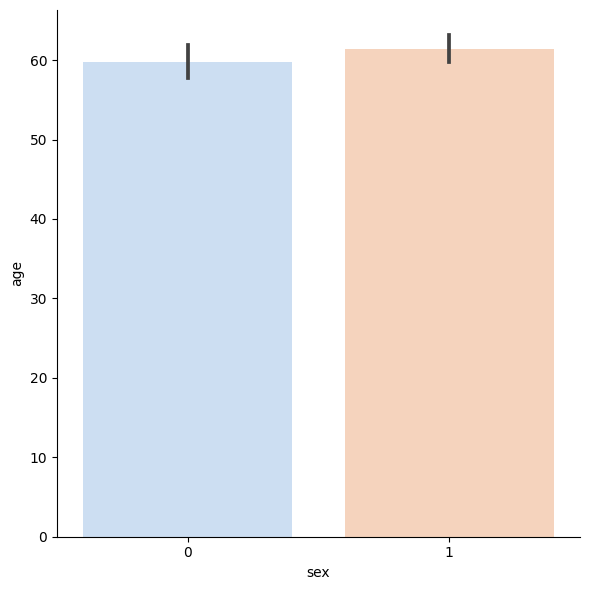

In [ ]:
sns.set_palette("pastel")
g=sns.catplot(x="sex", y="age",
                data=df, kind="bar",alpha=.6, height=6);


Graph for showing death event vs sex when age is taken into consideration :

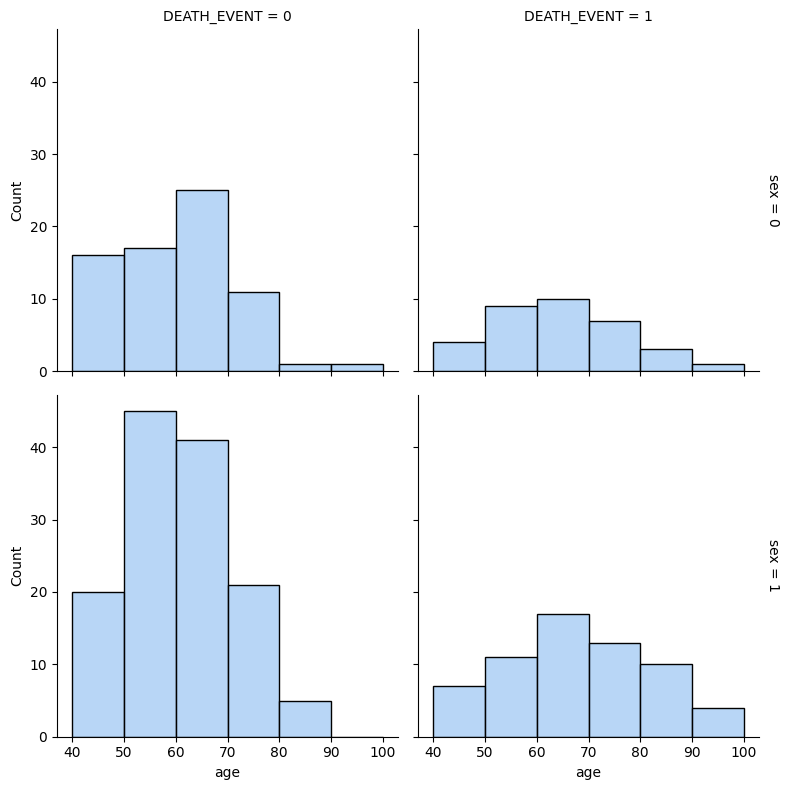

In [ ]:
sns.displot(
    df, x="age", col="DEATH_EVENT", row="sex",
    binwidth=10, height=4, facet_kws=dict(margin_titles=True),
)

How age affects blood pressure :

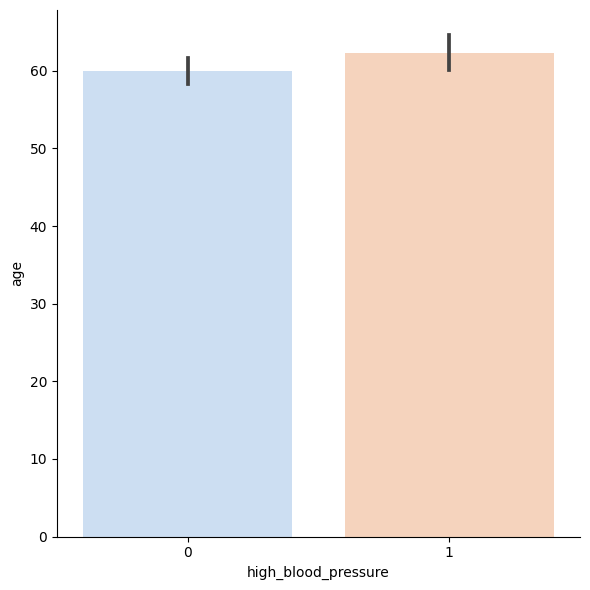

In [ ]:
sns.set_palette("pastel")
g=sns.catplot(x="high_blood_pressure", y="age",
                data=df, kind="bar",alpha=.6, height=6);

How age and blood pressue are related with mortality taken into consideration :

[Text(47.097222222222214, 0.5, 'age')]

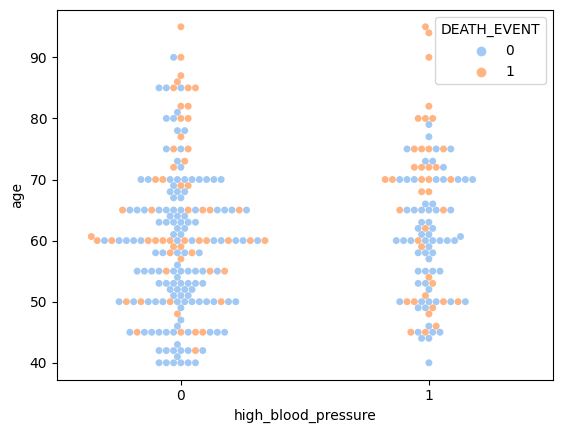

In [ ]:
ax = sns.swarmplot(data=df, x="high_blood_pressure", y="age", hue="DEATH_EVENT")
ax.set(ylabel="age")

as the age progreses we notice that blood pressure also increases thereby we see higher mortality rate

[Text(47.097222222222214, 0.5, 'age')]

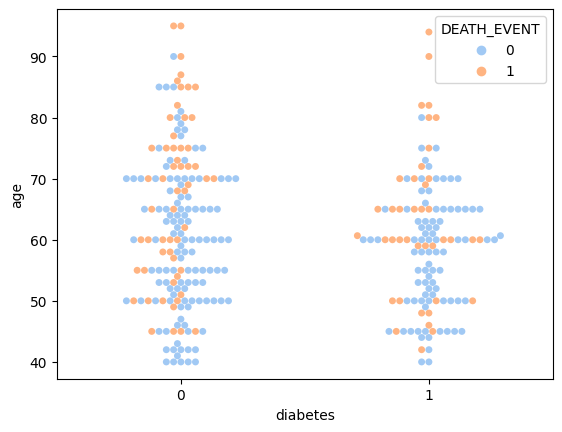

In [ ]:
ax = sns.swarmplot(data=df, x="diabetes", y="age", hue="DEATH_EVENT")
ax.set(ylabel="age")

How anaemia and age are related :

[Text(47.097222222222214, 0.5, 'age')]

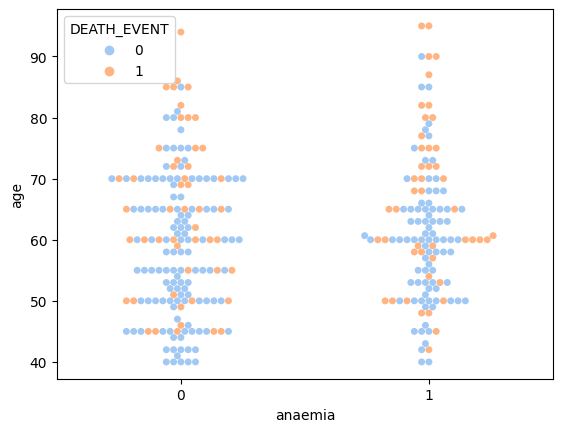

In [ ]:
ax = sns.swarmplot(data=df, x="anaemia", y="age", hue="DEATH_EVENT")
ax.set(ylabel="age")

How smoking and age are related :

[Text(47.097222222222214, 0.5, 'age')]

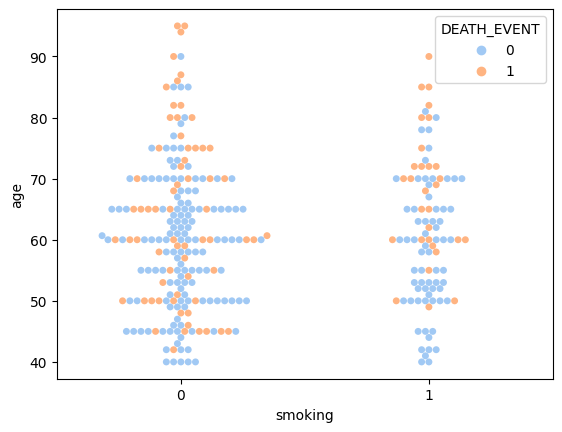

In [ ]:
ax = sns.swarmplot(data=df, x="smoking", y="age", hue="DEATH_EVENT")
ax.set(ylabel="age")

Plot of death event :

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

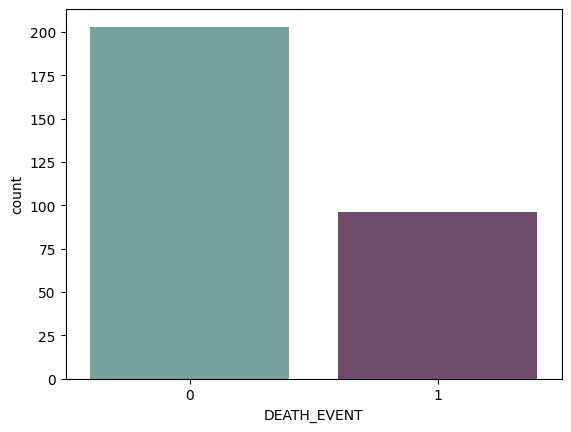

In [ ]:
cols= ["#6daa9f","#774571"]
sns.countplot(x= df["DEATH_EVENT"], palette= cols)

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
corr=df.corr()

<Axes: >

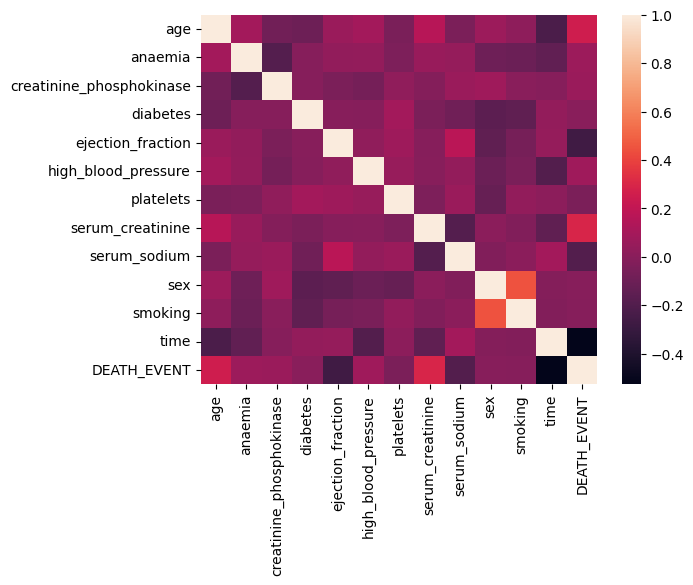

In [ ]:
sns.heatmap(corr)

There is a correlation between gender and smoking. Death event is correlated serum_creatinine and age.

In [ ]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

We resampled the death event data as there was a major difference in the count

In [ ]:
data_minority_resample = resample(data_minority, replace = True, n_samples = 194, random_state = 42)

In [ ]:
data_minority_resample.shape

(194, 13)

In [ ]:
features = pd.concat([data_majority, data_minority_resample])

In [ ]:
features

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.00,1.00,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.00,1.30,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.00,0.80,135,1,0,22,0
33,50.0,1,159,1,30,0,302000.00,1.20,138,0,0,29,0
38,60.0,0,2656,1,30,0,305000.00,2.30,137,1,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,69.0,0,582,0,20,0,266000.00,1.20,134,1,1,73,1
163,50.0,1,2334,1,35,0,75000.00,0.90,142,0,0,126,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
119,86.0,0,582,0,38,0,263358.03,1.83,134,0,0,95,1


In [ ]:
input = features.drop(columns = ['DEATH_EVENT'])
target = features['DEATH_EVENT']

In [ ]:
target

14     0
20     0
23     0
33     0
38     0
      ..
74     1
163    1
2      1
119    1
126    1
Name: DEATH_EVENT, Length: 397, dtype: int64

In [ ]:
input

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.00,1.00,138,0,0,12
20,65.0,1,52,0,25,1,276000.00,1.30,137,0,0,16
23,53.0,0,63,1,60,0,368000.00,0.80,135,1,0,22
33,50.0,1,159,1,30,0,302000.00,1.20,138,0,0,29
38,60.0,0,2656,1,30,0,305000.00,2.30,137,1,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
74,69.0,0,582,0,20,0,266000.00,1.20,134,1,1,73
163,50.0,1,2334,1,35,0,75000.00,0.90,142,0,0,126
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7
119,86.0,0,582,0,38,0,263358.03,1.83,134,0,0,95


[0.09096363 0.02885327 0.07545536 0.02950207 0.15714875 0.02912402
 0.06944667 0.11775052 0.07947917 0.02599591 0.02702185 0.26925878]


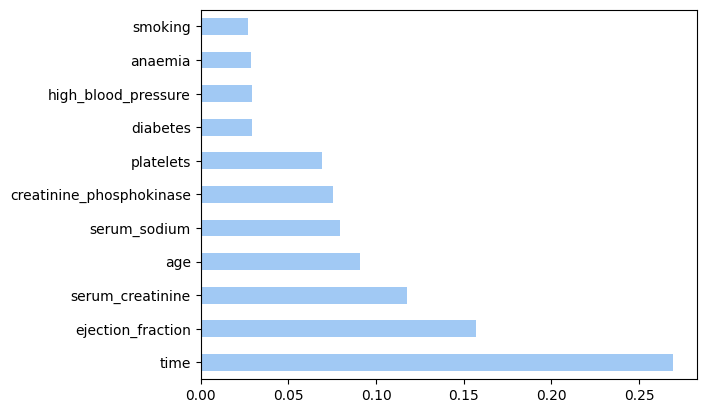

In [ ]:
X = input  #independent columns
y = target
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(317, 12)
(317,)
(80, 12)
(80,)


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_test_scaled=scaler.fit_transform(X_test)
X_train_scaled=scaler.transform(X_train)

## MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report,roc_curve, roc_auc_score

def create_models(seed=4):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('Decision_tree', DecisionTreeClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed, max_iter=1000)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('XGBClassifier', XGBClassifier(random_state=seed)))

    return models

# create a list with all the algorithms we are going to assess
models = create_models()

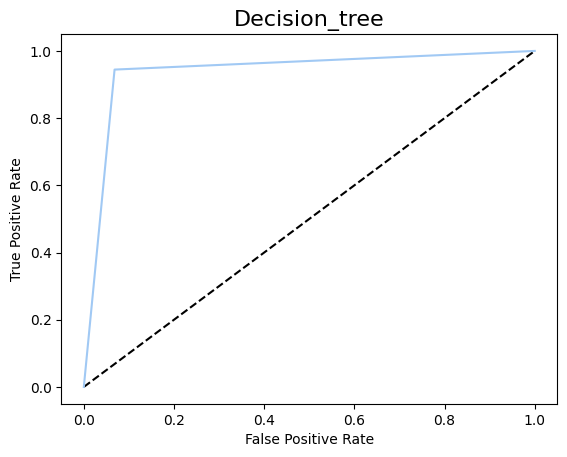


Classifier: Decision_tree,  Recall: 0.9444444444444444)


Classifier: Decision_tree,  Roc_AUC_SCORE: 0.9381313131313133)



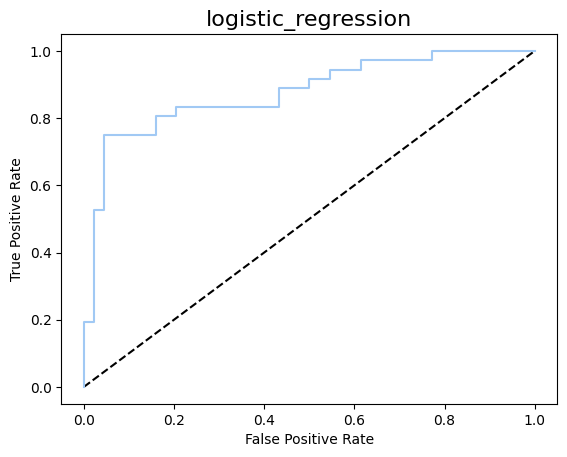


Classifier: logistic_regression,  Recall: 0.7777777777777778)


Classifier: logistic_regression,  Roc_AUC_SCORE: 0.8762626262626262)



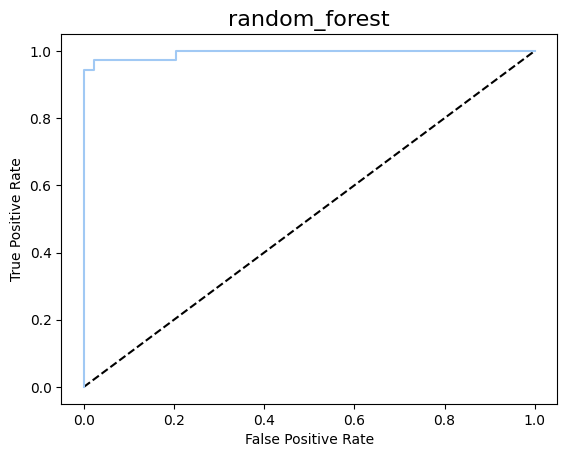


Classifier: random_forest,  Recall: 0.9722222222222222)


Classifier: random_forest,  Roc_AUC_SCORE: 0.9936868686868686)



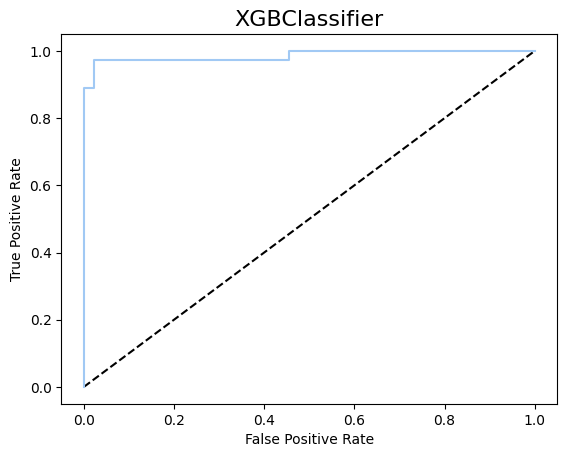


Classifier: XGBClassifier,  Recall: 0.9722222222222222)


Classifier: XGBClassifier,  Roc_AUC_SCORE: 0.985479797979798)



In [ ]:
results = []
names = []
accuracys = []
precisions = []
auc_score=[]
f1 = []
scoring = 'Recall'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy
    recall = recall_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    # ROC Curve
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--' )
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name,fontsize=16)
    plt.show()
    # append the model name and the accuracy to the lists
    results.append(recall)
    names.append(name)
    accuracys.append(accuracy)
    precisions.append(precision)
    auc_score.append(auc)
    # print classifier accuracy
    print("\nClassifier: {}, \033[1m Recall: {}\033[0m)\n".format(name, recall))
    print("\nClassifier: {}, \033[1m Roc_AUC_SCORE: {}\033[0m)\n".format(name,auc))


In [ ]:
result_dict = {'MODEL': names, 'RECALL': results, 'ACCURACY':accuracys,'PRECISIONS': precisions,'ROC_AUC':auc_score}
df2 = pd.DataFrame(result_dict)
df2

,MODEL,RECALL,ACCURACY,PRECISIONS,ROC_AUC
0,Decision_tree,0.944444,0.9375,0.918919,0.938131
1,logistic_regression,0.777778,0.8125,0.800000,0.876263
2,random_forest,0.972222,0.9500,0.921053,0.993687
3,XGBClassifier,0.972222,0.9500,0.921053,0.985480


## HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
def hyper_create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    hyper_models = []
    hyper_models.append(('Decision_tree', DecisionTreeClassifier()))
    hyper_models.append(('logistic_regression', LogisticRegression(random_state=seed, max_iter=1000)))
    hyper_models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    hyper_models.append(('XGBClassifier', XGBClassifier(random_state=seed)))

    return hyper_models

# create a list with all the algorithms we are going to assess
hyper_models = hyper_create_models()

In [ ]:
results_hyper = []
names_hyper = []
accuracys_hyper = []
precisions_hyper = []
auc_hyper=[]
def estimator(rf_random):
  for name, model in hyper_models:
      # fit the model with the training data
      model.fit(X_train, y_train).predict(X_test)
      # make predictions with the testing data
      predictions = model.predict(X_test)
      # calculate accuracy
      recall = recall_score(y_test, predictions)
      accuracy = accuracy_score(y_test, predictions)
      precision = precision_score(y_test, predictions)
      # ROC Curve
      y_pred_prob = model.predict_proba(X_test)[:,1]
      fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
      auc = roc_auc_score(y_test, y_pred_prob)
      plt.plot([0, 1], [0, 1], 'k--' )
      plt.plot(fpr,tpr,label="AUC="+str(auc))
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title(name,fontsize=16)
      plt.show()
      # append the model name and the accuracy to the lists
      results_hyper.append(recall)
      names_hyper.append(name)
      accuracys_hyper.append(accuracy)
      precisions_hyper.append(precision)
      auc_hyper.append(auc)
      print("\nClassifier: {}, \033[1m Recall: {}\033[0m)\n".format(name, recall))
      print("\nClassifier: {}, \033[1m Roc_AUC_SCORE: {}\033[0m)\n".format(name,auc))

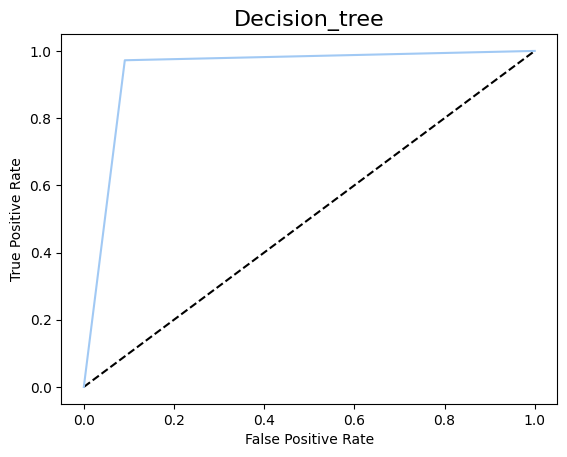


Classifier: Decision_tree,  Recall: 0.9722222222222222)


Classifier: Decision_tree,  Roc_AUC_SCORE: 0.9406565656565657)



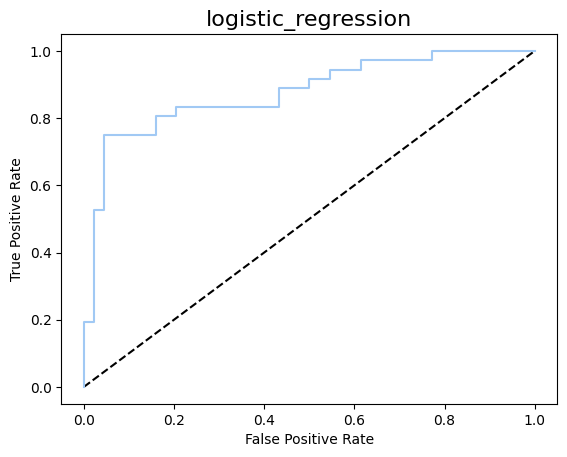


Classifier: logistic_regression,  Recall: 0.7777777777777778)


Classifier: logistic_regression,  Roc_AUC_SCORE: 0.8762626262626262)



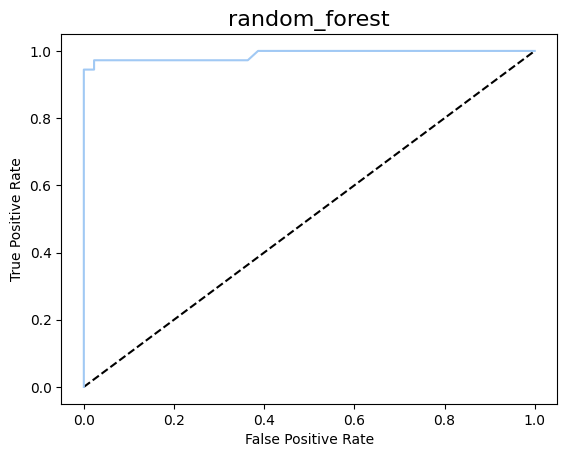


Classifier: random_forest,  Recall: 0.9722222222222222)


Classifier: random_forest,  Roc_AUC_SCORE: 0.9889520202020201)



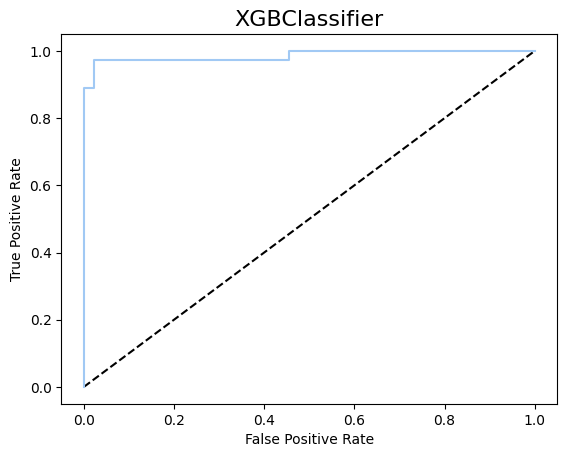


Classifier: XGBClassifier,  Recall: 0.9722222222222222)


Classifier: XGBClassifier,  Roc_AUC_SCORE: 0.985479797979798)



,MODEL,RECALL,ACCURACY,PRECISIONS,ROC_AUC
0,Decision_tree,0.972222,0.9375,0.897436,0.940657
1,logistic_regression,0.777778,0.8125,0.800000,0.876263
2,random_forest,0.972222,0.9625,0.945946,0.988952
3,XGBClassifier,0.972222,0.9500,0.921053,0.985480


In [ ]:
rf_random = RandomizedSearchCV(estimator = hyper_models, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)
estimator(rf_random)

result_dict = {'MODEL': names_hyper, 'RECALL': results_hyper, 'ACCURACY':accuracys_hyper,'PRECISIONS': precisions_hyper,'ROC_AUC':auc_hyper}
df4 = pd.DataFrame(result_dict)
df4

## **eli5**

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# Fit the Logistic Regression model
logreg = LogisticRegression(random_state=4, max_iter=1000)
logreg.fit(X_train, y_train)

# Visualize feature weights
eli5.show_weights(logreg, feature_names=X.columns.tolist())


Weight?,Feature
+0.035,age
+0.022,serum_sodium
+0.006,serum_creatinine
+0.000,<BIAS>
+0.000,creatinine_phosphokinase
+0.000,high_blood_pressure
+0.000,sex
+0.000,diabetes
-0.000,platelets
-0.000,smoking


displays the importance of each feature in the logistic regression model.

The output of eli5.show_weights will provide information about the contribution of each feature to the model's prediction. It typically shows a list of features along with their corresponding weights. The weights indicate the direction and strength of the relationship between each feature and the target variabl

In [ ]:
# Explain negative prediction
#negative_prediction_index = 0  # Replace with the index of a negative prediction in the test data
negative_prediction = X_test[y_test == 0].iloc[0]
eli5.show_prediction(logreg, negative_prediction, feature_names=X.columns.tolist())

# Explain positive prediction
#positive_prediction_index = 1  # Replace with the index of a positive prediction in the test data
positive_prediction = X_test[y_test == 1].iloc[0]
eli5.show_prediction(logreg, positive_prediction, feature_names=X.columns.tolist())


In [ ]:
from sklearn.tree import export_graphviz
import graphviz
import eli5

# Fit the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=4)
decision_tree.fit(X_train, y_train)

# Visualize feature importance
eli5.show_weights(decision_tree, feature_names=X.columns.tolist())


Weight,Feature
0.5405,time
0.1705,serum_creatinine
0.0819,ejection_fraction
0.0641,platelets
0.0562,creatinine_phosphokinase
0.0445,age
0.0359,serum_sodium
0.0063,diabetes
0,smoking
0,sex


In [ ]:
# Explain negative prediction
negative_prediction_index = 0  # Replace with the index of a negative prediction in the test data
negative_prediction = X_test[y_test == 0].iloc[0]
eli5.show_prediction(decision_tree, negative_prediction, feature_names=X.columns.tolist())

# Explain positive prediction
positive_prediction_index = 1  # Replace with the index of a positive prediction in the test data
positive_prediction =  X_test[y_test == 1].iloc[0]
eli5.show_prediction(decision_tree, positive_prediction, feature_names=X.columns.tolist())
